In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\ACER NITRO\Documents\Achievement 4'

In [4]:
pd.options.display.max_columns= None

In [3]:
# Downloading the most recent data frame with the lastest additions - 'df_end_final.pkl'
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_final_subset.pkl'))

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_days,Busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag,age_group,income_group,department,dependants_group,family_profile
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,31-45 years old,Low Income,beverages,Has dependants,married female with children
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy days,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,31-45 years old,Low Income,beverages,Has dependants,married female with children
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy days,Regularly busy,Most orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,31-45 years old,Low Income,beverages,Has dependants,married female with children
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy days,Least busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,31-45 years old,Low Income,beverages,Has dependants,married female with children
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy days,Least busy,Most orders,10,New customer,6.367797,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,31-45 years old,Low Income,beverages,Has dependants,married female with children


In [6]:
df['family_profile'].value_counts(dropna = False)

family_profile
married male with children      10947746
married female with children    10795965
single male, no children         3881398
single female, no children       3858283
single male with children         757596
single female with children       723576
Name: count, dtype: int64

## Step 6 : Creating  visualization to show the distribution of profiles

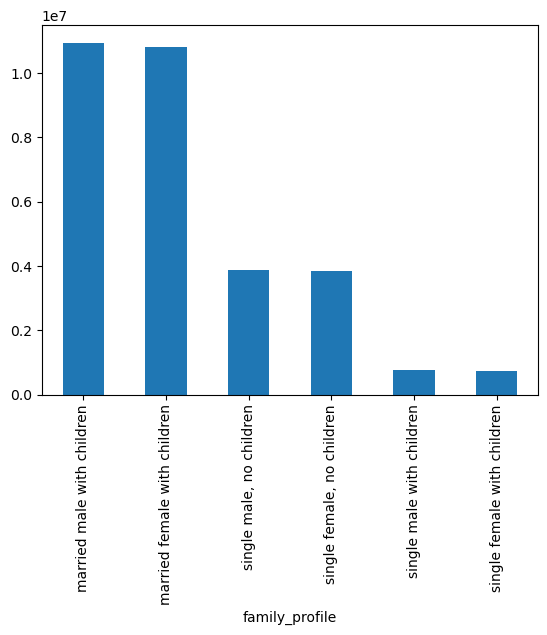

In [7]:
family_profile_bar = df['family_profile'].value_counts().plot.bar()

In [8]:
family_profile_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'family_profile_distribution_bar1.png'))

## Step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [9]:
family_profile_agg = df.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [10]:
family_profile_agg

order_id prices                    
                                 count    min       mean      max
family_profile                                                   
married female with children  10795965    1.0  11.874497  99999.0
married male with children    10947746    1.0  12.013314  99999.0
single female with children     723576    1.0  12.214567  99999.0
single female, no children     3858283    1.0  11.664725  99999.0
single male with children       757596    1.0   9.625240  99999.0
single male, no children       3881398    1.0  12.537981  99999.0

## Step 8 : Compare your customer profiles with regions and departments

In [11]:
fam_region_profile = pd.crosstab(df['family_profile'],df['region'], dropna = False)

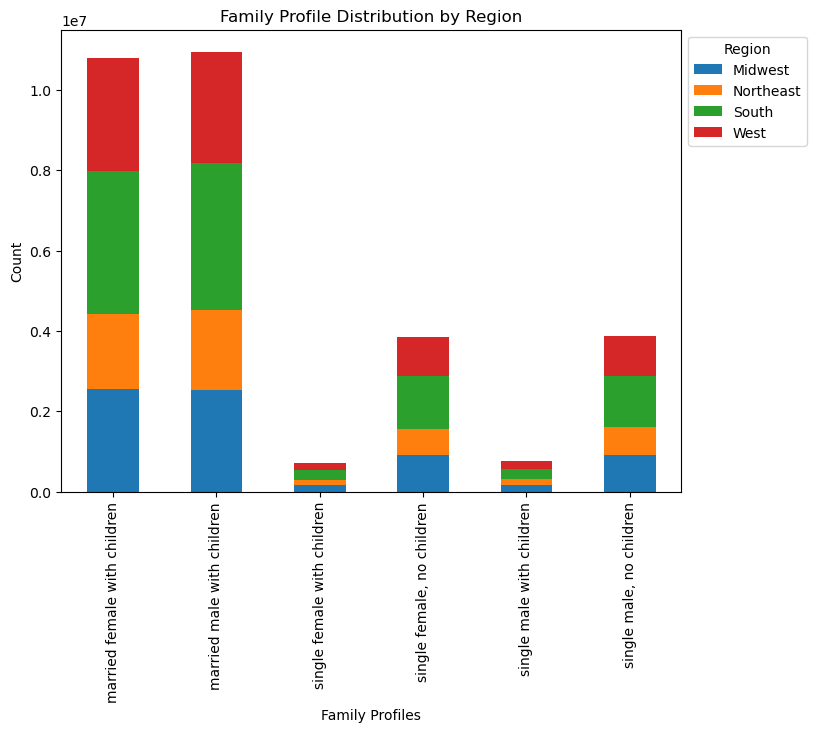

In [15]:
fam_region_profile_bar_stacked = fam_region_profile.plot.bar(stacked=True, figsize=(8, 6))

plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')

In [19]:
fam_region_profile_bar_stacked.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'fam_region_profile_bar_stacked.png'))

## Bar chart -Orders by order frequency

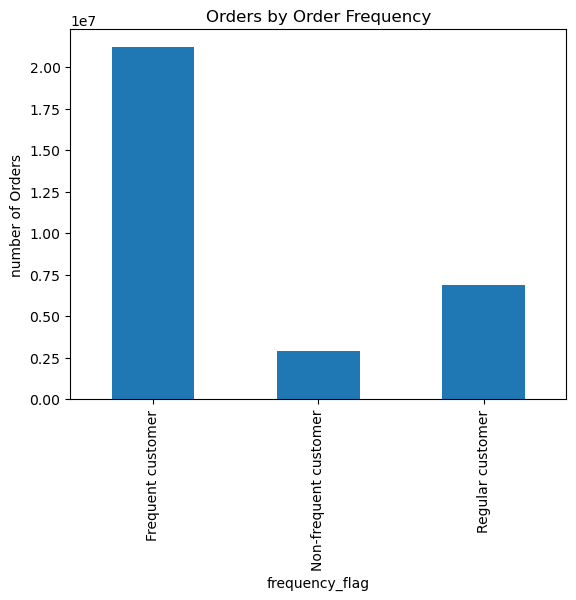

In [63]:
# Bar chart for order frequency
bar_freq = df['frequency_flag'].value_counts().sort_index().plot.bar()
bar_freq.set_title('Orders by Order Frequency')
plt.ylabel("number of Orders")
plt.show()

In [65]:
# Export visual
bar_freq.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'frequency_bar.png'))

## Bar chart - number of orders by income

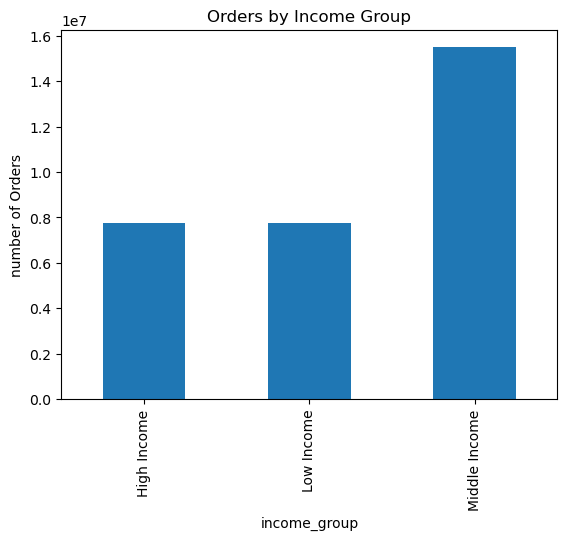

In [70]:
#Bar chart for income 
bar_income = df['income_group'].value_counts().sort_index().plot.bar()
bar_income.set_title('Orders by Income Group')
plt.ylabel("number of Orders")
plt.show()

In [67]:
bar_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_bar.png'))

## Bar chart - orders by department

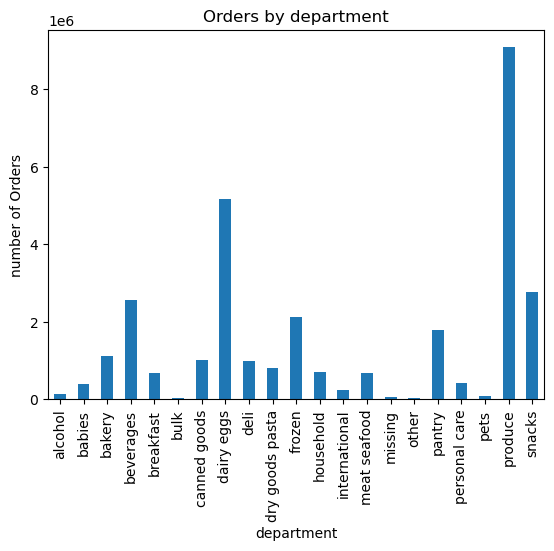

In [72]:
#Bar chart for department
bar_orders_dept = df['department'].value_counts().sort_index().plot.bar()
bar_orders_dept.set_title('Orders by department')
plt.ylabel("number of Orders")
plt.show()

In [39]:
# Export visual
bar_orders_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'orders_by_department_bar.png'))

## Bar chart by age group

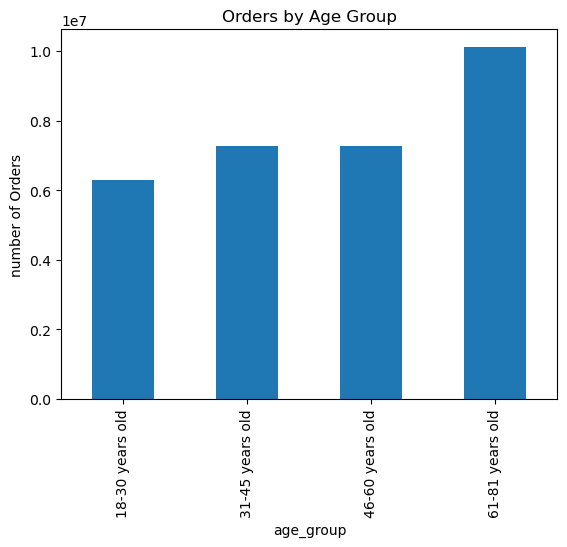

In [8]:
# bar chart for age groups
bar_age = df['age_group'].value_counts().sort_index().plot.bar()
bar_age.set_title('Orders by Age Group')
plt.ylabel("number of Orders")
plt.show()

In [9]:
# Export visual
bar_age.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_bar.png'))

## Bar chart by price range

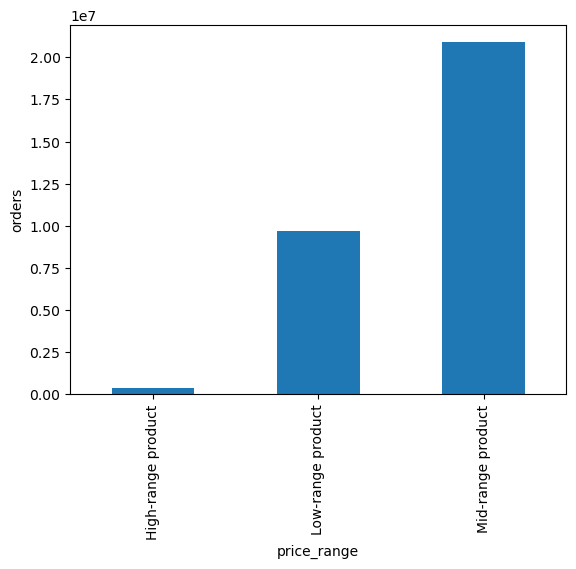

In [73]:
#price range bar chart
price_range_bar = df['price_range_loc'].value_counts().sort_index().plot.bar()
bar_age.set_title('orders by price range')
plt.ylabel("orders")
plt.xlabel("price_range")
plt.show()

In [35]:
# Export visual
price_range_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_range_bar.png'))

## customers distribution chart

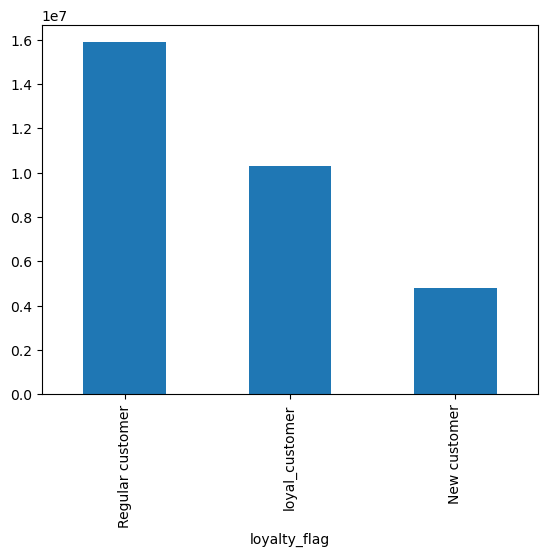

In [42]:
# customers distribution chart
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar()

In [41]:
loyalty_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_bar.png'))

## spending habit by age group

In [11]:
# spending habit by age group
crosstab_age_dept = pd.crosstab(df['department'], df['age_group'], dropna=False)

In [12]:
crosstab_age_dept

age_group,18-30 years old,31-45 years old,46-60 years old,61-81 years old
department,,,,
alcohol,30435,34234,34330,45628
babies,84070,97463,95840,133019
bakery,227595,264380,262836,366017
beverages,519241,596744,611229,844687
breakfast,137635,157252,158424,217539
bulk,6960,7767,7795,10929
canned goods,208244,236040,238305,329485
dairy eggs,1056276,1221535,1211427,1687944
deli,203753,236420,234694,328967


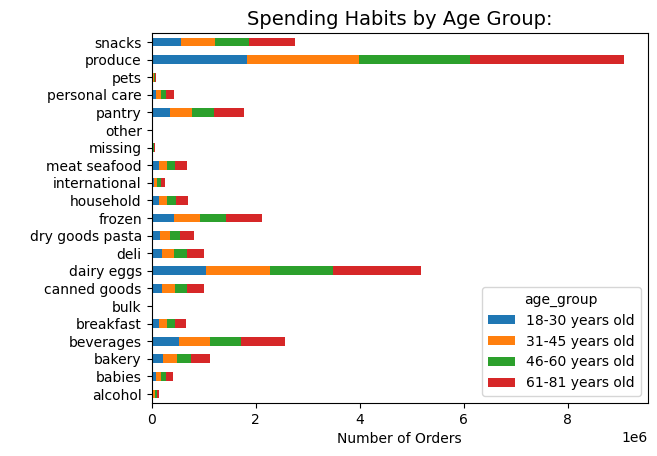

In [14]:
# Bar chart
crossbar_age_dept = crosstab_age_dept.plot.barh(stacked=True)
plt.ylabel(" ")
plt.xticks(rotation=0)
plt.xlabel("Number of Orders")
plt.title("Spending Habits by Age Group:", fontsize=14)
plt.show()

In [20]:
# Export visual
crossbar_age_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'spending_habit_age_bar.png'))

## orders by family profile

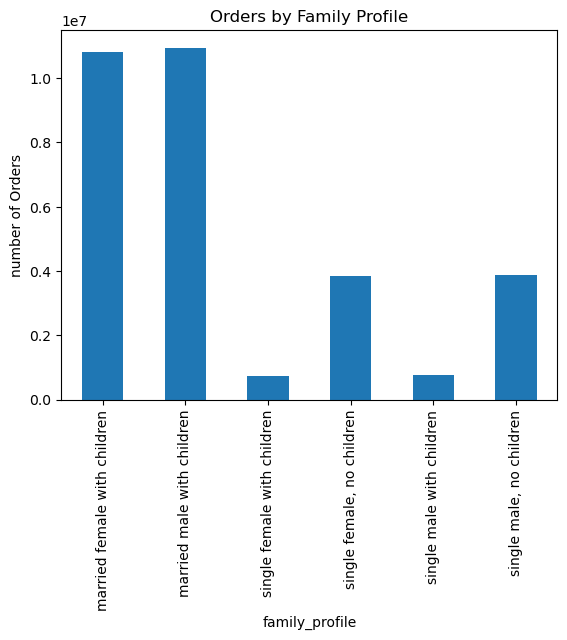

In [57]:
bar_family = df['family_profile'].value_counts().sort_index().plot.bar()
bar_family.set_title('Orders by Family Profile')
plt.ylabel("number of Orders")
plt.show()

In [58]:
# Export visual
bar_family.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'sbar_family.png'))

## ordering habits by region and loyalty status

In [48]:
# Create a crosstab 
loyalty_flag_region = pd.crosstab(df['region'], df['loyalty_flag'], dropna=False)



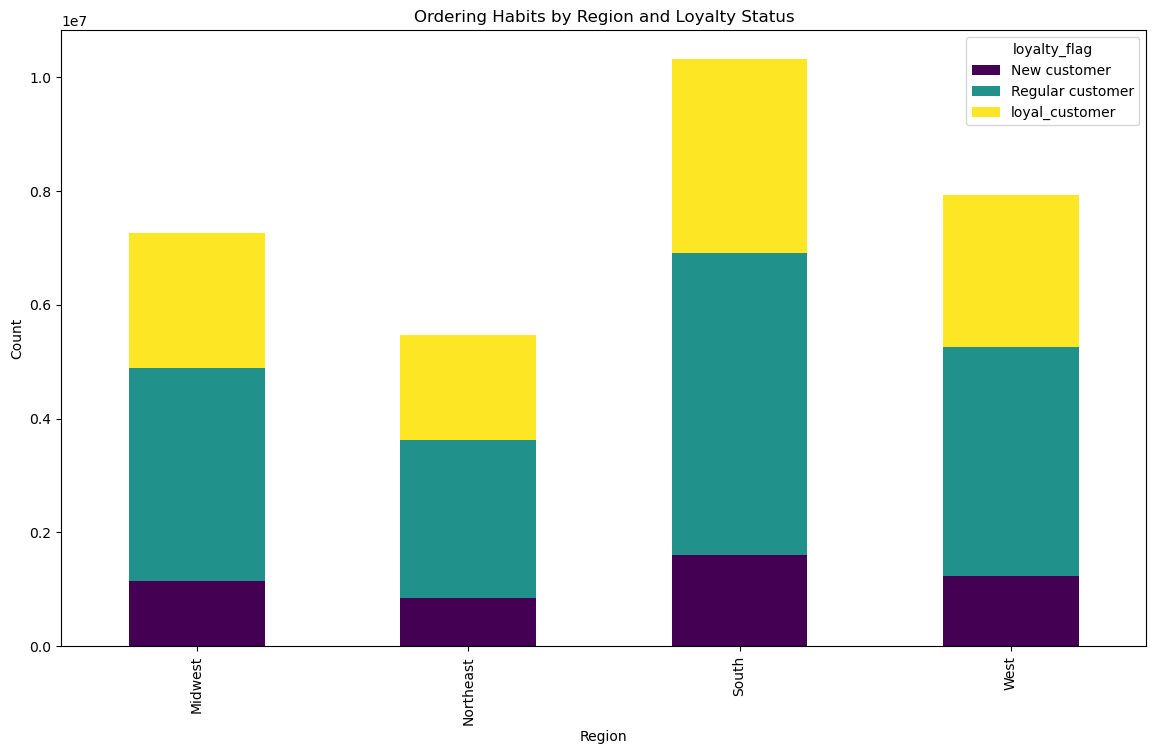

In [53]:

loyalty_flag_region=loyalty_flag_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Ordering Habits by Region and Loyalty Status')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [55]:
# Save the figure
loyalty_flag_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_flag_region_bar.png'))


## ordering habits based on a customer’s loyalty status

In [43]:
# ordering habits based on a customer’s loyalty status
crosstab_age_dept = pd.crosstab(df['department'], df['loyalty_flag'], dropna=False)

In [46]:
# Export visual
crossbar_loyalty_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'ordering habit_loyalty_bar.png'))

In [47]:
# spending habits by order frequency
crosstab_freq_dept = pd.crosstab(df['department'], df['frequency_flag'], dropna=False)

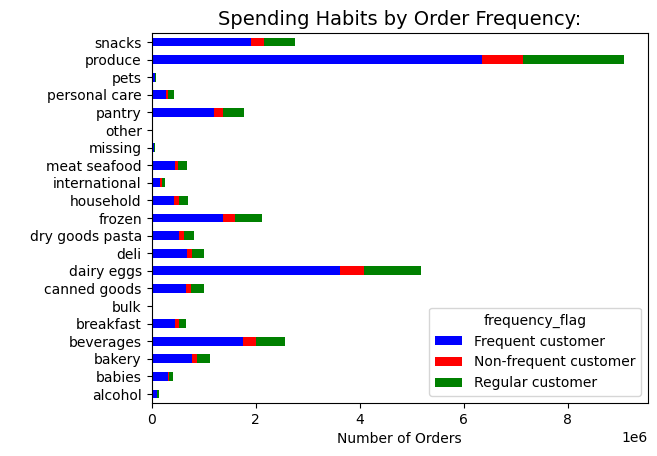

In [18]:
crossbar_freq_dept = crosstab_freq_dept.plot.barh(stacked=True, color=['blue','Red', 'Green'])
plt.ylabel(" ")
plt.xticks(rotation=0)
plt.xlabel("Number of Orders")
plt.title("Spending Habits by Order Frequency:", fontsize=14)
plt.show()

In [21]:
crossbar_freq_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations','freq_dept_bar'))

### spending habits by spending flag

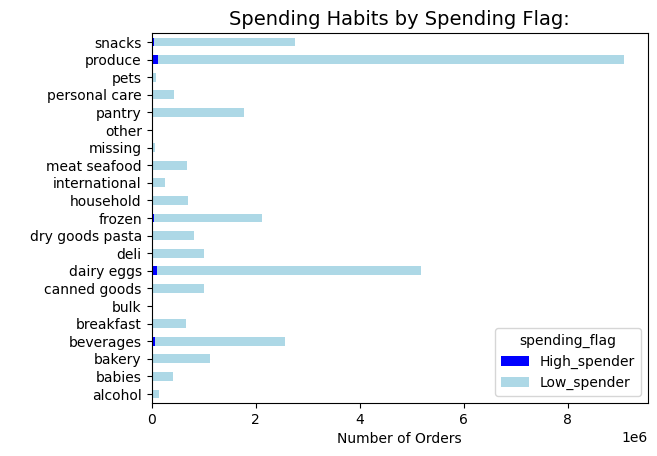

In [68]:

crosstab_spend_dept = pd.crosstab(df['department'], df['spending_flag'], dropna=False)
crossbar_spend_dept = crosstab_spend_dept.plot.barh(stacked=True, color=['blue','lightblue'])
plt.ylabel(" ")
plt.xticks(rotation=0)
plt.xlabel("Number of Orders")
plt.title("Spending Habits by Spending Flag:", fontsize=14)
plt.show()

In [24]:
prices_by_hour = pd.crosstab(df['order_hour_of_day'],df['price_range_loc'], dropna = False)

In [25]:
prices_by_hour

price_range_loc,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,2644,64819,140579
1,1335,34033,74253
2,885,20622,44184
3,611,15029,33156
4,664,15711,34388
5,1018,26074,57326
6,3622,86902,190489
7,11274,267170,584769
8,21155,518313,1119642


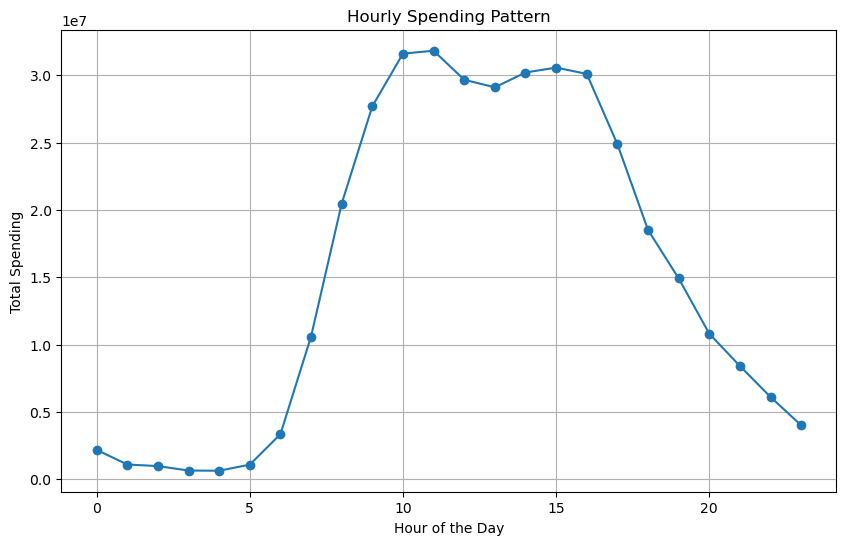

In [32]:
hourly_spending = df.groupby('order_hour_of_day')['prices'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hourly_spending.index, hourly_spending.values, marker='o')
ax.set_title('Hourly Spending Pattern')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Spending')
ax.grid(True)


In [30]:
# export the plot
fig.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hourly_spending_plot.png'))